In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

In [ ]:
os.listdir("./EALPR")

In [ ]:
os.listdir("./EALPR/EALPR- Plates dataset/")[:5]

In [ ]:
os.listdir("./EALPR/EALPR- LP characters dataset/Characters Labeling/")[:5]

In [ ]:
def find_files(filename, search_path):
    result = []
# Walking top-down from the root
    for root, dir, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))
        return result

In [ ]:
def getFilename(filename):
    filename_image =filename.split('/')[4].split('.')[0]+'.png'
    if len(find_files(filename_image,'./EALPR/EALPR- Plates dataset'))==0:
         filename_image =filename.split('/')[4].split('.')[0]+'.jpg'
    if len(find_files(filename_image,'./EALPR/EALPR- Plates dataset'))==0:
         filename_image =filename.split('/')[4].split('.')[0]+'.JPG'
    if len(find_files(filename_image,'./EALPR/EALPR- Plates dataset'))==0:
         filename_image =filename.split('/')[4].split('.')[0]+'.jpeg'
    filepath_image = os.path.join('./EALPR/EALPR- Plates dataset',filename_image)
    return filepath_image

In [ ]:
from skimage import io
path = './EALPR/EALPR- LP characters dataset/Characters Labeling'
labels_dict = dict(clas=[],filepath=[],center_x=[],center_y=[],bb_w=[],bb_h=[])
files=os.listdir(path)
for filename in files:
    if filename=='classes.txt':
        continue
    filePath=path+"/"+filename
    image_path=getFilename(filePath)
    with open(filePath) as cur:
        #print("hi")
        lines=cur.readlines()
        for line in lines:
            if not line.strip():   #empty
                break
            info=line.split()
            if len(info)<5:
                continue
            labels_dict['filepath'].append(str('./EALPR/EALPR- Plates dataset/'+image_path.split('/')[3]))
            labels_dict['clas'].append(int(info[0]) )             # class label
            labels_dict['center_x'].append(float(info[1]))    # center x of the bounding box
            labels_dict['center_y'].append(float(info[2]))   # center y of the bounding box
            labels_dict['bb_w'].append(float(info[3]))    # weight of bounding box
            labels_dict['bb_h'].append(float(info[4]))   # height of bounding box
        cur.close()

In [ ]:
data= pd.DataFrame(labels_dict)
data.to_csv('data.csv',index=False)
data

In [ ]:
print("No Of Images: "+str(data["filepath"].nunique()))
images=data["filepath"].unique()
print(len(images))
images[:2]

In [ ]:
train_ids=images[:1582]   #80%
val_ids=images[1582:1780]  #10%
test_ids=images[1780:]    #10
print(len(train_ids)+len(val_ids)+len(test_ids))

train_df = data[data['filepath'].isin(train_ids)]
val_df = data[data['filepath'].isin(val_ids)]
test_df=data[data['filepath'].isin(test_ids)]

train_df["clas"] = train_df["clas"].apply(lambda x: x+1)
val_df["clas"] = val_df["clas"].apply(lambda x: x+1)
test_df["clas"] = test_df["clas"].apply(lambda x: x+1)
train_df.shape,val_df.shape,test_df.shape

In [ ]:
path='./data_images'
os.mkdir(path)
os.mkdir(path +'/train')
os.mkdir(path+'/test')
os.mkdir(path+'/val')

In [ ]:
 train_df['filepath'][0]

In [ ]:
import shutil
original_images=r"./EALPR/EALPR- Plates dataset/"
original_labels=r"./EALPR/EALPR- LP characters dataset/Characters Labeling/"

In [ ]:
#for train data
target = r'./data_images/train/'
for x in train_df['filepath']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
#for val data
target = r'./data_images/val/'
for x in val_df['filepath']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
#for test data
target = r'./data_images/test/'
for x in test_df['filepath']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
(len(os.listdir('./data_images/test/'))+len(os.listdir('./data_images/val/'))+len(os.listdir('./data_images/train/')))/2

In [ ]:
labels_class_name='./EALPR/EALPR- LP characters dataset/Characters Labeling/classes.txt'
class_labels_dict={}
class_labels_list=[]
with open(labels_class_name) as cur:
    info = cur.readlines()
    for i in range(len(info)):
        class_labels_dict[i] = info[i][0]
        class_labels_list.append(info[i][0])
    cur.close()
print(class_labels_dict)
print('classes number:',len(class_labels_dict))

In [ ]:
class_labels_list

In [ ]:
shutil.copyfile(str("/content/gdrive/MyDrive/dataC.yaml"),str("./data_images/data.yaml"))

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [ ]:
%cd yolov7

In [ ]:
os.listdir("/content/yolov7")

In [ ]:
shutil.copyfile(str("/content/data_images/data.yaml"),str("/content/yolov7/data/data.yaml"))

In [ ]:
!wandb disabled
!python train.py --img 288 --batch 16 --epochs 120 --data /content/data_images/data.yaml  --weights 'yolov7.pt'

/bin/bash: wandb: command not found
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/data_images/data.yaml', device='', entity=None, epochs=120, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[288, 288], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warm

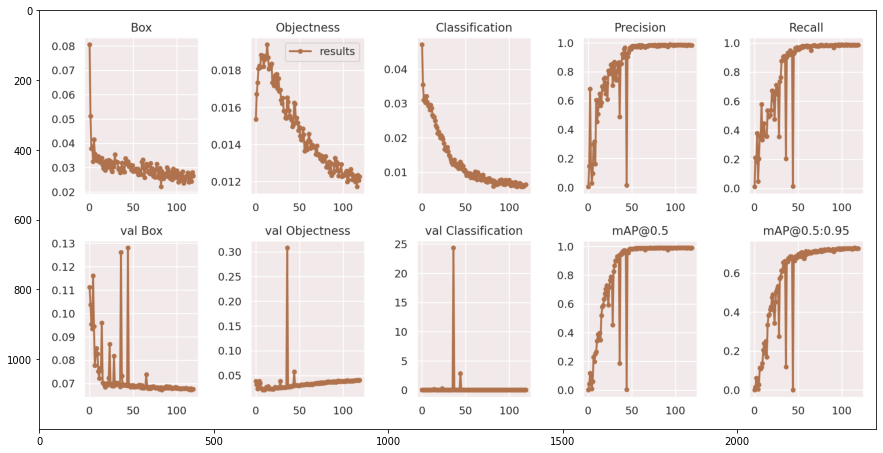

In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread("/content/yolov7/runs/train/exp2/results.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [ ]:
os.mkdir("/content/YOLO7Letters")

In [ ]:
all=os.listdir("/content/yolov7/runs/train/exp2/")
all.remove('weights')
for x in all:
    shutil.copyfile(str("/content/yolov7/runs/train/exp2/"+x),str("/content/YOLO7Letters/"+x))

In [ ]:
shutil.copyfile(str("/content/yolov7/runs/train/exp2/weights/best.pt"),str("/content/YOLO7Letters/best.pt"))
shutil.copyfile(str("/content/yolov7/runs/train/exp2/weights/last.pt"),str("/content/YOLO7Letters/last.pt"))

'/content/YOLO7Letters/last.pt'

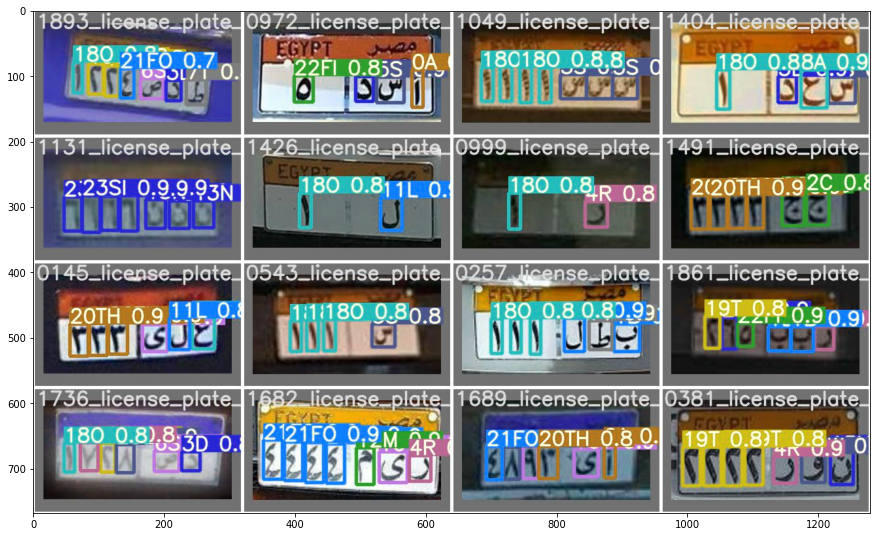

In [ ]:
img = cv.imread("/content/yolov7/runs/train/exp2/test_batch2_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

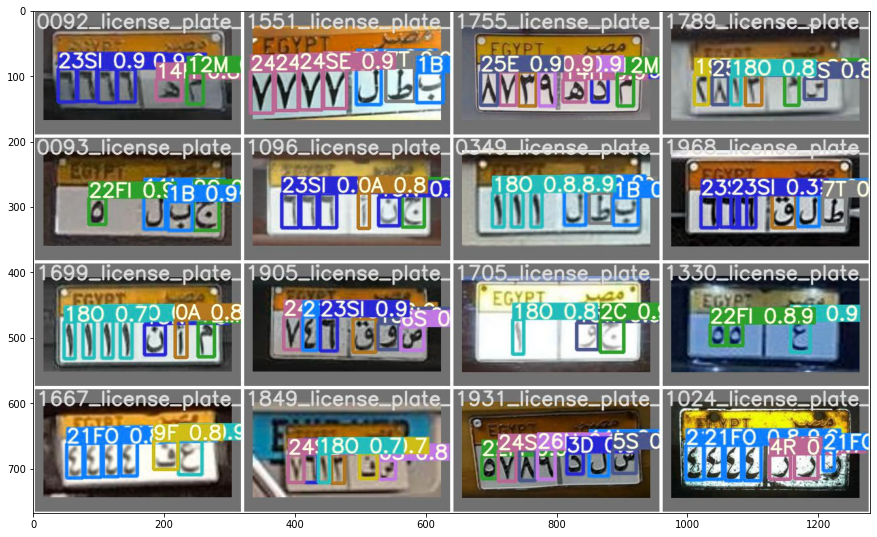

In [ ]:
img = cv.imread("/content/yolov7/runs/train/exp2/test_batch1_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img);

In [ ]:
shutil.copyfile(str("/content/data_images/data.yaml"),str("/content/data_images/test_data.yaml"))
#AND edit the file to test data path

'/content/data_images/test_data.yaml'

In [ ]:
!python test.py --weights /content/yolov7/runs/train/exp2/weights/best.pt --data /content/data_images/test_data.yaml --img 288

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/data_images/test_data.yaml', device='', exist_ok=False, img_size=288, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36619936 parameters, 6194944 gradients, 103.6 GFLOPS
 Convert model to Traced-model... 
 

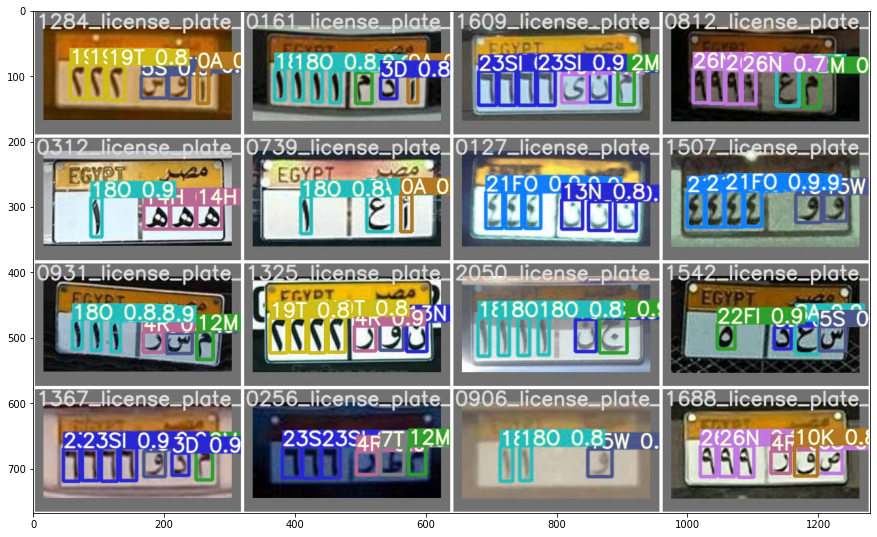

In [ ]:
img = cv.imread("/content/yolov7/runs/test/exp/test_batch1_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img);

In [ ]:
!zip -r /content/yolov7/runs/test.zip /content/yolov7/runs/test

  adding: content/yolov7/runs/test/ (stored 0%)
  adding: content/yolov7/runs/test/exp/ (stored 0%)
  adding: content/yolov7/runs/test/exp/R_curve.png (deflated 12%)
  adding: content/yolov7/runs/test/exp/test_batch2_labels.jpg (deflated 14%)
  adding: content/yolov7/runs/test/exp/F1_curve.png (deflated 10%)
  adding: content/yolov7/runs/test/exp/test_batch2_pred.jpg (deflated 13%)
  adding: content/yolov7/runs/test/exp/test_batch0_pred.jpg (deflated 14%)
  adding: content/yolov7/runs/test/exp/test_batch1_pred.jpg (deflated 12%)
  adding: content/yolov7/runs/test/exp/confusion_matrix.png (deflated 15%)
  adding: content/yolov7/runs/test/exp/P_curve.png (deflated 12%)
  adding: content/yolov7/runs/test/exp/test_batch0_labels.jpg (deflated 15%)
  adding: content/yolov7/runs/test/exp/test_batch1_labels.jpg (deflated 13%)
  adding: content/yolov7/runs/test/exp/PR_curve.png (deflated 23%)


In [ ]:
shutil.copyfile(str("/content/yolov7/runs/test.zip"),str("/content/YOLO7Letters/test.zip"))

'/content/YOLO7Letters/test.zip'

In [ ]:
!zip -r /content/YOLO7Letters.zip /content/YOLO7Letters

  adding: content/YOLO7Letters/ (stored 0%)
  adding: content/YOLO7Letters/R_curve.png (deflated 12%)
  adding: content/YOLO7Letters/train_batch6.jpg (deflated 4%)
  adding: content/YOLO7Letters/opt.yaml (deflated 47%)
  adding: content/YOLO7Letters/train_batch3.jpg (deflated 5%)
  adding: content/YOLO7Letters/events.out.tfevents.1675464066.ee16864164ff.3192.0 (deflated 68%)
  adding: content/YOLO7Letters/test_batch2_labels.jpg (deflated 14%)
  adding: content/YOLO7Letters/F1_curve.png (deflated 11%)
  adding: content/YOLO7Letters/test_batch2_pred.jpg (deflated 13%)
  adding: content/YOLO7Letters/test_batch0_pred.jpg (deflated 11%)
  adding: content/YOLO7Letters/best.pt (deflated 8%)
  adding: content/YOLO7Letters/test_batch1_pred.jpg (deflated 12%)
  adding: content/YOLO7Letters/confusion_matrix.png (deflated 15%)
  adding: content/YOLO7Letters/train_batch5.jpg (deflated 5%)
  adding: content/YOLO7Letters/last.pt (deflated 8%)
  adding: content/YOLO7Letters/hyp.yaml (deflated 44%)
  a

In [ ]:
!python detect.py --source /content/l1.jpeg --weights /content/yolov7/runs/train/exp2/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/l1.jpeg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36619936 parameters, 6194944 gradients, 103.6 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 

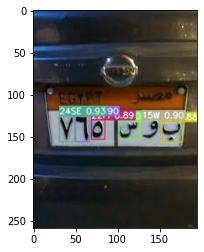

In [ ]:
img = cv.imread("/content/yolov7/runs/detect/exp/l1.jpeg")
plt.imshow(img)